In [1]:
!pip install lazypredict scikit-learn matplotlib seaborn


In [2]:
import pandas as pd

# Load your datasets
features = pd.read_csv('/content/GEO_HG_PPI.csv',header=0)
labels = pd.read_csv('/content/labels_GEO_HG.csv')

# Prepare the data (assuming labels need to be transposed and properly aligned)
labels = labels.T
labels.columns = ['Label']


In [3]:
labels

,Label
GSM177885,1
GSM177887,1
GSM177894,1
GSM177895,1
GSM177899,1
...,...
GSM615763,0
GSM615764,0
GSM615766,0
GSM615768,0


In [4]:
# Transpose the features dataframe so that rows are samples and columns are features
features = features.set_index('probe').T


In [5]:
features.head()

probe,RPL41,EEF1A1,TPT1,RPL23A,UBC,RPS2,ACTB,HUWE1,RPS4X,RPLP0,...,PTH,RPE65,KLRC4,G6PC,TLL1,POU1F1,SLC22A3,RAG2,SI,MSTN
GSM177885,14.027973,13.321452,13.383143,13.752067,13.459339,13.672751,13.406419,13.118830,12.833613,13.009293,...,6.115904,6.038711,6.091257,6.254978,5.998992,6.029053,6.212970,6.104444,5.913941,6.074499
GSM177887,13.892742,14.027973,13.431648,13.459339,13.155470,13.254169,13.406419,12.970659,12.889865,12.906840,...,6.254749,5.954199,6.114698,6.058185,6.137693,6.246585,6.118346,5.988550,6.080971,5.946836
GSM177894,14.201369,13.892742,13.340611,13.752067,13.269927,13.238841,13.029795,12.925001,13.040590,13.195257,...,6.119285,6.149428,6.084118,6.082904,6.074499,6.236203,6.092384,6.060823,6.046823,6.003550
GSM177895,14.201369,13.615073,13.269927,13.672751,13.303665,13.254169,13.040590,13.009293,13.107198,12.915989,...,6.183513,5.993970,6.058948,6.101276,6.007939,6.058948,6.149798,6.094918,6.069102,5.963548
GSM177899,14.201369,13.340611,13.321452,13.948924,12.794457,12.961327,12.520043,12.756682,12.749382,12.915989,...,6.218246,6.167575,6.162198,6.170033,6.127875,6.149798,6.169692,6.051885,6.065562,6.094638


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming features is your transposed dataframe with samples as rows and features as columns
feature_columns = features.columns

# Select a subset of features if there are too many, e.g., 20 features
# If you want to plot all, just use feature_columns directly
selected_features = np.random.choice(feature_columns, 20, replace=False)

# Set up the matplotlib figure
n_cols = 4  # Number of columns in the plot grid
n_rows = int(np.ceil(len(selected_features) / n_cols))  # Calculate the number of rows needed

plt.figure(figsize=(n_cols * 4, n_rows * 3))  # Adjust the size of the overall figure

# Create a histogram for each feature
for i, feature in enumerate(selected_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(features[feature], kde=True, color=np.random.rand(3,))
    plt.title(feature)
    plt.tight_layout()

plt.show()



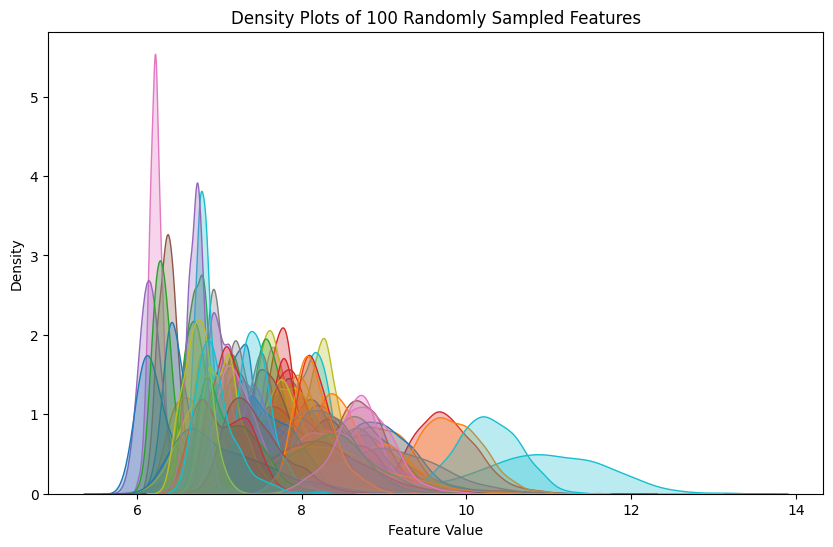

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Randomly sample 100 features from the dataframe, assuming there are at least 100 features
sampled_features = features.columns.to_series().sample(100, random_state=1)

# Plotting density plots for the sampled features
for feature in sampled_features:
    sns.kdeplot(features[feature], common_norm=False, fill=True, alpha=0.3)

plt.title('Density Plots of 100 Randomly Sampled Features')
plt.xlabel('Feature Value')
plt.ylabel('Density')
# plt.legend()  # You can remove this if there are too many features and the legend becomes cluttered
plt.show()


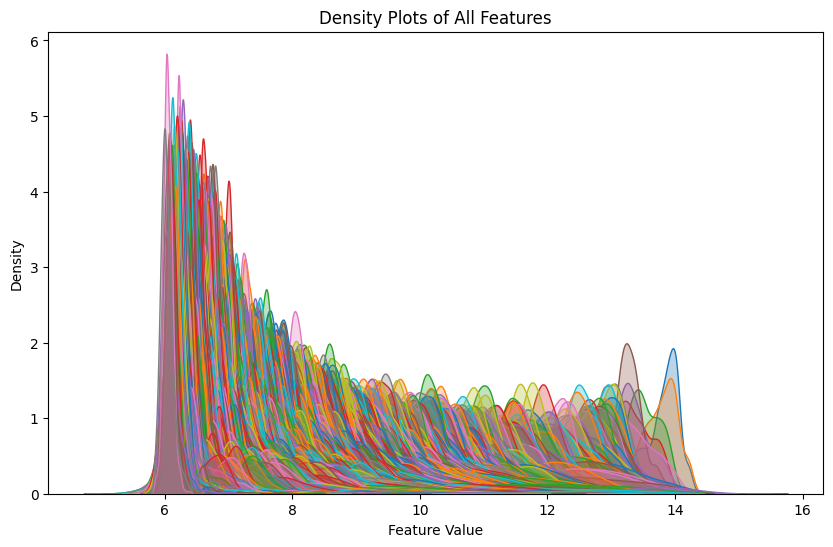

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plotting density plots for each feature
for feature in features.columns:
    sns.kdeplot(features[feature], label=feature, common_norm=False, fill=True, alpha=0.3)

plt.title('Density Plots of All Features')
plt.xlabel('Feature Value')
plt.ylabel('Density')
#plt.legend()  # You can remove this if there are too many features and the legend becomes cluttered
plt.show()


In [6]:
from sklearn.preprocessing import MinMaxScaler


# Save the sample IDs
sample_ids = features.index

features_scaled = scaler.fit_transform(features)

# Convert back to DataFrame
features_scaled = pd.DataFrame(features_scaled, columns=features.columns,index=sample_ids)


NameError: name 'scaler' is not defined

In [ ]:
features_scaled


probe,RPL41,EEF1A1,TPT1,RPL23A,UBC,RPS2,ACTB,HUWE1,RPS4X,RPLP0,...,PTH,RPE65,KLRC4,G6PC,TLL1,POU1F1,SLC22A3,RAG2,SI,MSTN
GSM177885,0.906198,0.709250,0.575897,0.828436,0.609930,0.659370,0.721926,0.643478,0.543096,0.604070,...,0.353363,0.222675,0.202702,0.548624,0.218162,0.096307,0.241234,0.421814,0.114381,0.322235
GSM177887,0.833042,0.942705,0.601038,0.646411,0.450193,0.389646,0.721926,0.560055,0.569810,0.560899,...,0.586386,0.105429,0.225004,0.283034,0.419187,0.212317,0.178611,0.230836,0.406174,0.140238
GSM177894,1.000000,0.898021,0.553852,0.828436,0.510360,0.379769,0.590182,0.534350,0.641389,0.682429,...,0.359037,0.376276,0.195910,0.316395,0.327597,0.206780,0.161428,0.349932,0.346519,0.221088
GSM177895,1.000000,0.806271,0.517215,0.779115,0.528096,0.389646,0.593958,0.581807,0.673021,0.564754,...,0.466831,0.160605,0.171962,0.341190,0.231129,0.112249,0.199426,0.406116,0.385440,0.164061
GSM177899,1.000000,0.715581,0.543922,0.950846,0.260416,0.200945,0.411870,0.439583,0.503096,0.564754,...,0.525123,0.401452,0.270196,0.433984,0.404956,0.160700,0.212592,0.335203,0.379255,0.350946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM615763,0.448336,0.942705,0.509048,0.191468,0.609930,0.351684,0.605165,0.359783,0.416488,0.859326,...,0.471106,0.397492,0.242479,0.458647,0.244392,0.133070,0.000000,0.457506,0.298910,0.216727
GSM615764,0.682832,0.851538,0.486018,0.228369,0.626728,0.317978,0.706269,0.298686,0.419710,0.630757,...,0.531505,0.280429,0.229368,0.421473,0.462495,0.117293,0.157564,0.440698,0.210437,0.042396
GSM615766,0.833042,0.942705,0.869153,0.405946,0.644219,0.433001,0.658124,0.711046,0.651447,0.713892,...,0.555686,0.208543,0.206991,0.585918,0.355954,0.114990,0.141273,0.492088,0.079960,0.120987
GSM615768,0.780561,0.916585,0.767118,0.572584,0.537446,0.421540,0.601367,0.737920,0.662072,0.572296,...,0.475392,0.433215,0.280946,0.284063,0.461462,0.093680,0.103630,0.467536,0.350172,0.267128


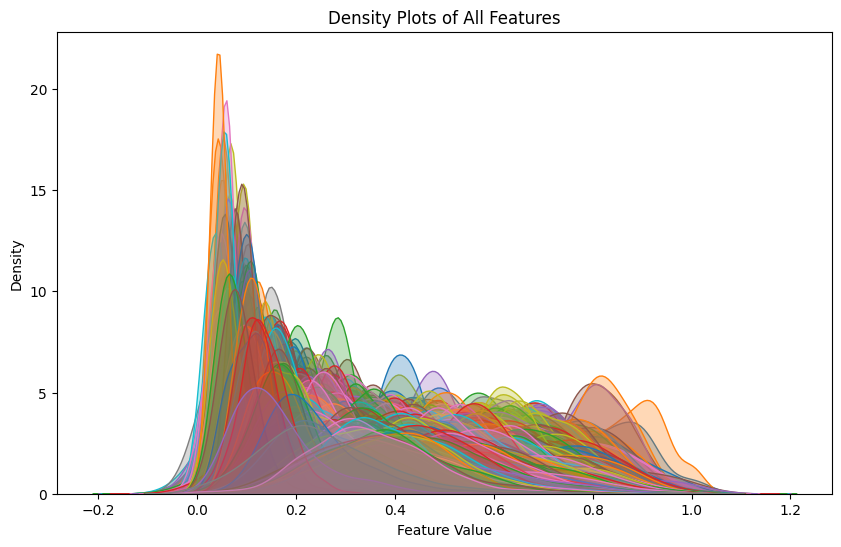

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plotting density plots for each feature
for feature in features_scaled.columns:
    sns.kdeplot(features_scaled[feature], label=feature,common_norm=False, fill=True, alpha=0.3)

plt.title('Density Plots of All Features')
plt.xlabel('Feature Value')
plt.ylabel('Density')
#plt.legend()  # You can remove this if there are too many features and the legend becomes cluttered
plt.show()


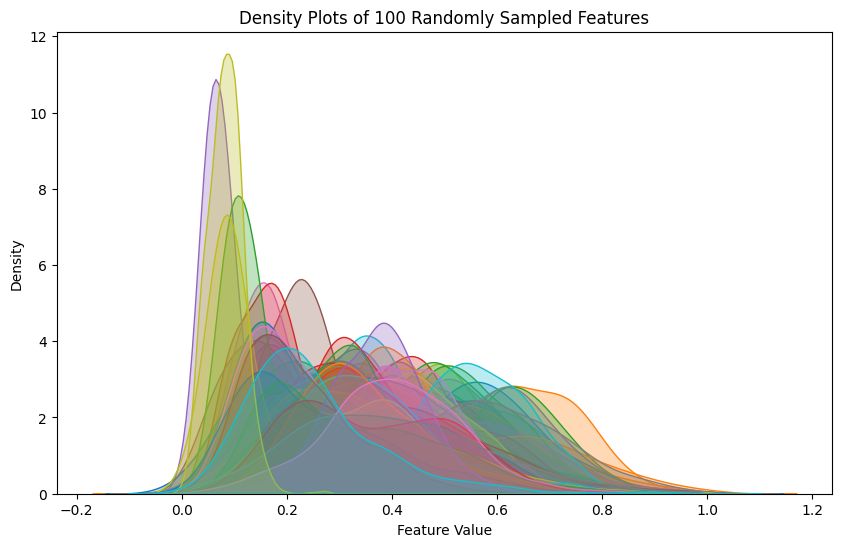

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Randomly sample 100 features from the dataframe, assuming there are at least 100 features
sampled_features = features_scaled.columns.to_series().sample(100, random_state=1)

# Plotting density plots for the sampled features
for feature in sampled_features:
    sns.kdeplot(features_scaled[feature], common_norm=False, fill=True, alpha=0.3)

plt.title('Density Plots of 100 Randomly Sampled Features')
plt.xlabel('Feature Value')
plt.ylabel('Density')
# plt.legend()  # You can remove this if there are too many features and the legend becomes cluttered
plt.show()


In [ ]:
## IGNORE ##
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plotting density plots for each feature with axes flipped
for feature in features_scaled.columns:
    sns.kdeplot(y=features_scaled[feature], common_norm=False, fill=True, alpha=0.3)

plt.title('Density Plots of All Features')
plt.ylabel('Feature Value')
plt.xlabel('Density')
plt.show()


In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# Split the data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.3, random_state=42)

# LazyClassifier to find the best model
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Save the model performance
models.to_csv('model_performance.csv')


 97%|█████████▋| 28/29 [01:50<00:07,  8.00s/it]

[LightGBM] [Info] Number of positive: 274, number of negative: 404
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.108953 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1551515
[LightGBM] [Info] Number of data points in the train set: 678, number of used features: 6888
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.404130 -> initscore=-0.388287
[LightGBM] [Info] Start training from score -0.388287
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

100%|██████████| 29/29 [02:36<00:00,  5.40s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [ ]:
models_perform = pd.read_csv('/content/model_performance.csv')

In [ ]:
models_perform

,Model,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
0,NuSVC,0.78,0.77,0.77,0.78,2.31
1,LogisticRegression,0.78,0.76,0.76,0.78,0.68
2,LinearSVC,0.77,0.76,0.76,0.77,1.51
3,Perceptron,0.76,0.76,0.76,0.76,0.36
4,SVC,0.78,0.75,0.75,0.77,2.37
5,PassiveAggressiveClassifier,0.75,0.74,0.74,0.75,0.54
6,LGBMClassifier,0.76,0.74,0.74,0.76,46.33
7,RidgeClassifierCV,0.75,0.73,0.73,0.75,0.60
8,RidgeClassifier,0.75,0.73,0.73,0.75,0.45
9,XGBClassifier,0.75,0.73,0.73,0.74,31.47


NuSVC Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import NuSVC

# Define the parameter grid for NuSVC
param_grid_nusvc = {
    'nu': [0.4, 0.5, 0.6],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Create a NuSVC model
nusvc = NuSVC()

# Instantiate the grid search model
grid_search_nusvc = GridSearchCV(estimator=nusvc, param_grid=param_grid_nusvc, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_nusvc.fit(X_train, y_train)

# Get the best parameters
best_params_nusvc = grid_search_nusvc.best_params_


Fitting 3 folds for each of 18 candidates, totalling 54 fits


In [ ]:
best_params_nusvc

{'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.4}

In [ ]:
best_nusvc = NuSVC(gamma='scale', kernel='rbf', nu=0.4)
best_nusvc.fit(X_train, y_train)


NuSVC(nu=0.4)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Predictions on the test set
y_pred = best_nusvc.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Model': ['NuSVC'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'ROC AUC': [roc_auc]
})

# Display the DataFrame
print(metrics_df)


   Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
0  NuSVC      0.79       0.77    0.69      0.73     0.77


LogisticRegression Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for LogisticRegression
param_grid_logreg = {
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300]
}

# Create a LogisticRegression model
logreg = LogisticRegression()

# Instantiate the grid search model
grid_search_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid_logreg, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_logreg.fit(X_train, y_train)

# Get the best parameters
best_params_logreg = grid_search_logreg.best_params_


Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [ ]:
best_params_logreg

{'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}

In [ ]:
from sklearn.linear_model import LogisticRegression

# Retrain LogisticRegression model with the best parameters
best_logreg = LogisticRegression(C=0.1, max_iter=100, solver='lbfgs')
best_logreg.fit(X_train, y_train)

# Evaluate the model
y_pred_logreg = best_logreg.predict(X_test)
metrics_logreg = {
    'Model': 'LogisticRegression',
    'Accuracy': accuracy_score(y_test, y_pred_logreg),
    'Precision': precision_score(y_test, y_pred_logreg),
    'Recall': recall_score(y_test, y_pred_logreg),
    'F1 Score': f1_score(y_test, y_pred_logreg),
    'ROC AUC': roc_auc_score(y_test, y_pred_logreg)
}

# Append the metrics to your DataFrame
metrics_df = metrics_df.append(metrics_logreg, ignore_index=True)

# Display the updated DataFrame
print(metrics_df)


                Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
0               NuSVC      0.79       0.77    0.69      0.73     0.77
1  LogisticRegression      0.76       0.74    0.65      0.69     0.75


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

# Model
gb = GradientBoostingClassifier()

# Parameters
param_dist = {"max_depth": sp_randInt(3, 10),
              "min_samples_split": sp_randInt(2, 11),
              "min_samples_leaf": sp_randInt(1, 11),
              "subsample": sp_randFloat(0.5, 1.0),
              "n_estimators": sp_randInt(100, 300)}

# RandomizedSearchCV
random_search = RandomizedSearchCV(gb, param_distributions=param_dist,
                                   n_iter=10, n_jobs=-1, cv=3, verbose=2)

# Fit
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model
best_gb = random_search.best_estimator_
y_pred_gb = best_gb.predict(X_test)
metrics_gb = {
    'Model': 'GradientBoosting',
    'Accuracy': accuracy_score(y_test, y_pred_gb),
    'Precision': precision_score(y_test, y_pred_gb),
    'Recall': recall_score(y_test, y_pred_gb),
    'F1 Score': f1_score(y_test, y_pred_gb),
    'ROC AUC': roc_auc_score(y_test, y_pred_gb)
}

# Append the metrics
metrics_df = metrics_df.append(metrics_gb, ignore_index=True)

# Display
print(metrics_df)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 253, 'subsample': 0.677569789844337}
                Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
0               NuSVC      0.79       0.77    0.69      0.73     0.77
1  LogisticRegression      0.76       0.74    0.65      0.69     0.75
2    GradientBoosting      0.77       0.78    0.62      0.69     0.75


###LinearSVC Hyperparameter Tuning

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV

# Model
linear_svc = LinearSVC()

# Parameters
param_dist_linear_svc = {
    'C': sp_randFloat(0.01, 10),
    'max_iter': sp_randInt(1000, 10000)
}

# RandomizedSearchCV
random_search_linear_svc = RandomizedSearchCV(linear_svc, param_distributions=param_dist_linear_svc,
                                              n_iter=10, cv=3, verbose=2, n_jobs=-1, random_state=42)

# Fit
random_search_linear_svc.fit(X_train, y_train)

# Evaluate the best model
best_linear_svc = random_search_linear_svc.best_estimator_
y_pred_linear_svc = best_linear_svc.predict(X_test)
metrics_linear_svc = {
    'Model': 'LinearSVC',
    'Accuracy': accuracy_score(y_test, y_pred_linear_svc),
    'Precision': precision_score(y_test, y_pred_linear_svc),
    'Recall': recall_score(y_test, y_pred_linear_svc),
    'F1 Score': f1_score(y_test, y_pred_linear_svc),
    'ROC AUC': roc_auc_score(y_test, y_pred_linear_svc)
}

# Append the metrics
metrics_df = metrics_df.append(metrics_linear_svc, ignore_index=True)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


###Perceptron Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import Perceptron

# Model
perceptron = Perceptron()

# Parameters
param_dist_perceptron = {
    'penalty': [None, 'l2', 'l1', 'elasticnet'],
    'alpha': sp_randFloat(0.0001, 0.01),
    'max_iter': sp_randInt(1000, 10000),
    'tol': sp_randFloat(0.001, 0.01)
}

# RandomizedSearchCV
random_search_perceptron = RandomizedSearchCV(perceptron, param_distributions=param_dist_perceptron,
                                              n_iter=10, cv=3, verbose=2, n_jobs=-1, random_state=42)

# Fit
random_search_perceptron.fit(X_train, y_train)

# Evaluate the best model
best_perceptron = random_search_perceptron.best_estimator_
y_pred_perceptron = best_perceptron.predict(X_test)
metrics_perceptron = {
    'Model': 'Perceptron',
    'Accuracy': accuracy_score(y_test, y_pred_perceptron),
    'Precision': precision_score(y_test, y_pred_perceptron),
    'Recall': recall_score(y_test, y_pred_perceptron),
    'F1 Score': f1_score(y_test, y_pred_perceptron),
    'ROC AUC': roc_auc_score(y_test, y_pred_perceptron)
}

# Append the metrics
metrics_df = metrics_df.append(metrics_perceptron, ignore_index=True)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


###SVC Hyperparameter Tuning

In [ ]:
from sklearn.svm import SVC

# Model
svc = SVC()

# Parameters
param_dist_svc = {
    'C': sp_randFloat(0.1, 10),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # Used only for 'poly' kernel
}

# RandomizedSearchCV
random_search_svc = RandomizedSearchCV(svc, param_distributions=param_dist_svc,
                                       n_iter=10, cv=3, verbose=2, n_jobs=-1, random_state=42)

# Fit
random_search_svc.fit(X_train, y_train)

# Evaluate the best model
best_svc = random_search_svc.best_estimator_
y_pred_svc = best_svc.predict(X_test)
metrics_svc = {
    'Model': 'SVC',
    'Accuracy': accuracy_score(y_test, y_pred_svc),
    'Precision': precision_score(y_test, y_pred_svc),
    'Recall': recall_score(y_test, y_pred_svc),
    'F1 Score': f1_score(y_test, y_pred_svc),
    'ROC AUC': roc_auc_score(y_test, y_pred_svc)
}

# Append the metrics
metrics_df = metrics_df.append(metrics_svc, ignore_index=True)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


###PassiveAggressiveClassifier Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

# Model
passive_agg = PassiveAggressiveClassifier()

# Parameters
param_dist_passive_agg = {
    'C': sp_randFloat(0.01, 10),
    'max_iter': sp_randInt(1000, 10000),
    'tol': sp_randFloat(0.0001, 0.01)
}

# RandomizedSearchCV
random_search_passive_agg = RandomizedSearchCV(passive_agg, param_distributions=param_dist_passive_agg,
                                               n_iter=10, cv=3, verbose=2, n_jobs=-1, random_state=42)

# Fit
random_search_passive_agg.fit(X_train, y_train)

# Evaluate the best model
best_passive_agg = random_search_passive_agg.best_estimator_
y_pred_passive_agg = best_passive_agg.predict(X_test)
metrics_passive_agg = {
    'Model': 'PassiveAggressiveClassifier',
    'Accuracy': accuracy_score(y_test, y_pred_passive_agg),
    'Precision': precision_score(y_test, y_pred_passive_agg),
    'Recall': recall_score(y_test, y_pred_passive_agg),
    'F1 Score': f1_score(y_test, y_pred_passive_agg),
    'ROC AUC': roc_auc_score(y_test, y_pred_passive_agg)
}

# Append the metrics
metrics_df = metrics_df.append(metrics_passive_agg, ignore_index=True)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,NuSVC,0.79,0.77,0.69,0.73,0.77
1,LogisticRegression,0.76,0.74,0.65,0.69,0.75
2,GradientBoosting,0.77,0.78,0.62,0.69,0.75
3,LinearSVC,0.76,0.74,0.64,0.68,0.74
4,Perceptron,0.42,0.41,1.00,0.58,0.51
5,SVC,0.79,0.77,0.69,0.73,0.77
6,PassiveAggressiveClassifier,0.75,0.72,0.64,0.68,0.73
7,Perceptron,0.42,0.41,1.00,0.58,0.51


###LGBMClassifier Hyperparameter Tuning

In [ ]:
from lightgbm import LGBMClassifier

# Model
lgbm = LGBMClassifier()

# Parameters
param_dist_lgbm = {
    'num_leaves': sp_randInt(20, 100),
    'learning_rate': sp_randFloat(0.01, 0.3),
    'n_estimators': sp_randInt(100, 1000),
    'max_depth': sp_randInt(-1, 20),
    'min_child_weight': sp_randFloat(0.001, 0.05),
    'subsample': sp_randFloat(0.5, 1),
    'colsample_bytree': sp_randFloat(0.5, 1)
}

# RandomizedSearchCV
random_search_lgbm = RandomizedSearchCV(lgbm, param_distributions=param_dist_lgbm,
                                        n_iter=10, cv=3, verbose=2, n_jobs=-1, random_state=42)

# Fit
random_search_lgbm.fit(X_train, y_train)

# Evaluate the best model
best_lgbm = random_search_lgbm.best_estimator_
y_pred_lgbm = best_lgbm.predict(X_test)
metrics_lgbm = {
    'Model': 'LGBMClassifier',
    'Accuracy': accuracy_score(y_test, y_pred_lgbm),
    'Precision': precision_score(y_test, y_pred_lgbm),
    'Recall': recall_score(y_test, y_pred_lgbm),
    'F1 Score': f1_score(y_test, y_pred_lgbm),
    'ROC AUC': roc_auc_score(y_test, y_pred_lgbm)
}

# Append the metrics
metrics_df = metrics_df.append(metrics_lgbm, ignore_index=True)


###RidgeClassifierCV Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import RidgeClassifierCV

# Model
ridge_cv = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10, 100], cv=3)

# Fit
ridge_cv.fit(X_train, y_train)

# Evaluate the model
y_pred_ridge_cv = ridge_cv.predict(X_test)
metrics_ridge_cv = {
    'Model': 'RidgeClassifierCV',
    'Accuracy': accuracy_score(y_test, y_pred_ridge_cv),
    'Precision': precision_score(y_test, y_pred_ridge_cv),
    'Recall': recall_score(y_test, y_pred_ridge_cv),
    'F1 Score': f1_score(y_test, y_pred_ridge_cv),
    'ROC AUC': roc_auc_score(y_test, y_pred_ridge_cv)
}

# Append the metrics
metrics_df = metrics_df.append(metrics_ridge_cv, ignore_index=True)


###RidgeClassifier Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Model
ridge = RidgeClassifier()

# Parameters
param_dist_ridge = {
    'alpha': sp_randFloat(0.1, 10)
}

# RandomizedSearchCV
random_search_ridge = RandomizedSearchCV(ridge, param_distributions=param_dist_ridge,
                                         n_iter=10, cv=3, verbose=2, n_jobs=-1, random_state=42)

# Fit
random_search_ridge.fit(X_train, y_train)

# Evaluate the best model
best_ridge = random_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
metrics_ridge = {
    'Model': 'RidgeClassifier',
    'Accuracy': accuracy_score(y_test, y_pred_ridge),
    'Precision': precision_score(y_test, y_pred_ridge),
    'Recall': recall_score(y_test, y_pred_ridge),
    'F1 Score': f1_score(y_test, y_pred_ridge),
    'ROC AUC': roc_auc_score(y_test, y_pred_ridge)
}

# Append the metrics
metrics_df = metrics_df.append(metrics_ridge, ignore_index=True)


###RandomForestClassifier Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Model
random_forest = RandomForestClassifier()

# Parameters
param_dist_rf = {
    'n_estimators': sp_randInt(100, 500),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': sp_randInt(4, 20),
    'min_samples_split': sp_randInt(2, 10),
    'min_samples_leaf': sp_randInt(1, 5),
    'bootstrap': [True, False]
}

# RandomizedSearchCV
random_search_rf = RandomizedSearchCV(random_forest, param_distributions=param_dist_rf,
                                      n_iter=10, cv=3, verbose=2, n_jobs=-1, random_state=42)

# Fit
random_search_rf.fit(X_train, y_train)

# Evaluate the best model
best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
metrics_rf = {
    'Model': 'RandomForestClassifier',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf),
    'ROC AUC': roc_auc_score(y_test, y_pred_rf)
}

# Append the metrics
metrics_df = metrics_df.append(metrics_rf, ignore_index=True)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,NuSVC,0.79,0.77,0.69,0.73,0.77
1,LogisticRegression,0.76,0.74,0.65,0.69,0.75
2,GradientBoosting,0.77,0.78,0.62,0.69,0.75
3,LinearSVC,0.76,0.74,0.64,0.68,0.74
4,Perceptron,0.42,0.41,1.00,0.58,0.51
5,SVC,0.79,0.77,0.69,0.73,0.77
6,PassiveAggressiveClassifier,0.75,0.72,0.64,0.68,0.73
7,Perceptron,0.42,0.41,1.00,0.58,0.51
8,RandomForestClassifier,0.76,0.76,0.60,0.67,0.73


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=25fdb418e5defcd35ed74dfbfe69d6178c5ebb5904515ed1f8394a73c9591bf9
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 3.4 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Model
random_forest = RandomForestClassifier()

# Parameters
param_dist_rf = {
    'n_estimators': sp_randInt(100, 500),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': sp_randInt(4, 20),
    'min_samples_split': sp_randInt(2, 10),
    'min_samples_leaf': sp_randInt(1, 5),
    'bootstrap': [True, False]
}

# RandomizedSearchCV
random_search_rf = RandomizedSearchCV(random_forest, param_distributions=param_dist_rf,
                                      n_iter=10, cv=3, verbose=2, n_jobs=-1, random_state=42)

# Fit
random_search_rf.fit(X_train, y_train)

# Evaluate the best model
best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)




# For LIME
import lime
import lime.lime_tabular

# Initialize LIME Explainer
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                        feature_names=X_train.columns,
                                                        class_names=['Negative', 'Positive'],
                                                        verbose=True, mode='classification')

# Explain a single prediction
i = 10  # Index of the observation to explain
lime_exp = explainer_lime.explain_instance(X_test.values[i], best_rf.predict_proba)
lime_exp.show_in_notebook(show_table=True)

# For SHAP
import shap

# Initialize SHAP Explainer
explainer_shap = shap.TreeExplainer(best_rf)
shap_values = explainer_shap.shap_values(X_test)

# Visualize the SHAP values for the 10th instance
shap.initjs()
shap.force_plot(explainer_shap.expected_value[1], shap_values[1][i], X_test.iloc[i])

# For Permutation Feature Importance
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(best_rf, X_test, y_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Intercept 0.4654625540076539
Prediction_local [0.46671087]
Right: 0.64048916811554


KeyboardInterrupt: 